In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import matplotlib.pyplot as plt 
import matplotlib.patches as patch 
from PIL import Image 

from deepface import DeepFace
from deepface.commons import functions

## DeepFace

In [2]:
# Detect & Embedding
img_path = "./test_images/aboflash1.jpg"

models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "Dlib", "ArcFace"]
embeddings = DeepFace.represent(img_path, model_name = models[3])

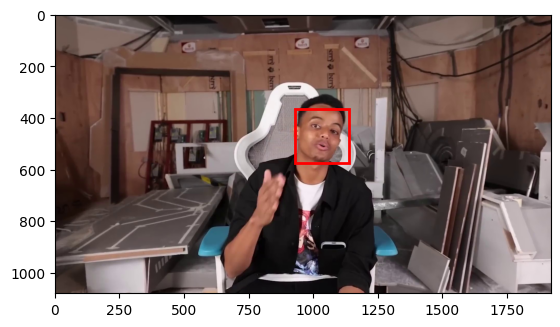

In [4]:
im = Image. open (img_path) 
fig, ax = plt.subplots() 

# 이미지 표시
ax.imshow(im) 

# 얼굴 주위에 사각형 그리기
face_coord = embeddings[ 0 ][ 'facial_area' ] 



rect = patch.Rectangle((face_coord[ 'x' ], face_coord[ 'y' ]), 
                         face_coord[ 'w' ], face_coord[ 'h' ], 
                         linewidth =2 , 
                         edgecolor = 'r' , 
                         facecolor = 'none' ) 

# 패치를 축에 추가
ax.add_patch(rect)

In [5]:
img = cv2.imread(img_path)

scale_factor = 0.9

width = face_coord['w']
height = face_coord['h']
x = face_coord['x']
y = face_coord['y']

cX = x + width//2
cY = y + height//2
M = (abs(width) + abs(height)) / 2

left = max(0, int(cX - scale_factor * M))
top = max(0, int(cY - scale_factor * M))
right = min(img.shape[1], int(cX + scale_factor * M))
bottom = min(img.shape[0], int(cY + scale_factor * M))

cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)

cv2.imshow('image', img)
cv2.waitKey(0)

cv2.destroyAllWindows()